## Детектирование объектов



In [2]:
pip install opencv-python

     ---------------------------------------- 38.1/38.1 MB 6.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Подключение необходимых модулей и библиотек
import numpy as np 
import pandas as pd 

import os

import matplotlib.pyplot as plt #for plotting images 

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import cv2
from sklearn import preprocessing
from pathlib import Path



In [4]:
labels_train = []
labels_test = []

path_train = []
path_test = []

In [5]:
train_path = "./fruits_detection/train_zip/train/"
test_path = "./fruits_detection/test_zip/test/"

In [6]:
# Посмотрим общее количество файлов
for dirname, _, filenames in os.walk('./fruits_detection'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./fruits_detection\test_zip\test\apple_77.jpg
./fruits_detection\test_zip\test\apple_77.xml
./fruits_detection\test_zip\test\apple_78.jpg
./fruits_detection\test_zip\test\apple_78.xml
./fruits_detection\test_zip\test\apple_79.jpg
./fruits_detection\test_zip\test\apple_79.xml
./fruits_detection\test_zip\test\apple_80.jpg
./fruits_detection\test_zip\test\apple_80.xml
./fruits_detection\test_zip\test\apple_81.jpg
./fruits_detection\test_zip\test\apple_81.xml
./fruits_detection\test_zip\test\apple_82.jpg
./fruits_detection\test_zip\test\apple_82.xml
./fruits_detection\test_zip\test\apple_83.jpg
./fruits_detection\test_zip\test\apple_83.xml
./fruits_detection\test_zip\test\apple_84.jpg
./fruits_detection\test_zip\test\apple_84.xml
./fruits_detection\test_zip\test\apple_85.jpg
./fruits_detection\test_zip\test\apple_85.xml
./fruits_detection\test_zip\test\apple_86.jpg
./fruits_detection\test_zip\test\apple_86.xml
./fruits_detection\test_zip\test\apple_87.jpg
./fruits_detection\test_zip\test\a

In [7]:
for filename in os.listdir(train_path):
    print(filename)

apple_1.jpg
apple_1.xml
apple_10.jpg
apple_10.xml
apple_11.jpg
apple_11.xml
apple_12.jpg
apple_12.xml
apple_13.jpg
apple_13.xml
apple_14.jpg
apple_14.xml
apple_15.jpg
apple_15.xml
apple_16.jpg
apple_16.xml
apple_17.jpg
apple_17.xml
apple_18.jpg
apple_18.xml
apple_19.jpg
apple_19.xml
apple_2.jpg
apple_2.xml
apple_20.jpg
apple_20.xml
apple_21.jpg
apple_21.xml
apple_22.jpg
apple_22.xml
apple_23.jpg
apple_23.xml
apple_24.jpg
apple_24.xml
apple_25.jpg
apple_25.xml
apple_26.jpg
apple_26.xml
apple_27.jpg
apple_27.xml
apple_28.jpg
apple_28.xml
apple_29.jpg
apple_29.xml
apple_3.jpg
apple_3.xml
apple_30.jpg
apple_30.xml
apple_31.jpg
apple_31.xml
apple_32.jpg
apple_32.xml
apple_33.jpg
apple_33.xml
apple_35.jpg
apple_35.xml
apple_36.jpg
apple_36.xml
apple_37.jpg
apple_37.xml
apple_38.jpg
apple_38.xml
apple_39.jpg
apple_39.xml
apple_4.jpg
apple_4.xml
apple_40.jpg
apple_40.xml
apple_41.jpg
apple_41.xml
apple_42.jpg
apple_42.xml
apple_43.jpg
apple_43.xml
apple_44.jpg
apple_44.xml
apple_45.jpg
apple_4

In [8]:
for filename in os.listdir(train_path):
    if(filename.split('.')[1]=="jpg"):
        labels_train.append(filename.split('_')[0])
        path_train.append(os.path.join(train_path, filename)) 

for filename in os.listdir(test_path):
    if(filename.split('.')[1]=="jpg"):
        labels_test.append(filename.split('_')[0])
        path_test.append(os.path.join(test_path, filename))  

In [10]:
label_train_unique = np.unique(np.array(labels_train))
label_test_unique = np.unique(np.array(labels_test))

In [11]:
print("Уникальные названия фруктов в тренировочном наборе: ", label_train_unique)
print("Количество 'jpg' файлов в тренировочном наборе: ", len(path_train))

print("\nУникальные названия фруктов в тестовом наборе: ", label_test_unique)
print("Количество 'jpg' файлов в тестовом наборе: ", len(path_test))

Уникальные названия фруктов в тренировочном наборе:  ['apple' 'banana' 'mixed' 'orange']
Количество 'jpg' файлов в тренировочном наборе:  240

Уникальные названия фруктов в тестовом наборе:  ['apple' 'banana' 'mixed' 'orange']
Количество 'jpg' файлов в тестовом наборе:  60


In [21]:
color_image = cv2.imread(path_train[0])
color_image.shape

(349, 349, 3)

In [22]:
cv2.imshow('Color all',color_image)
cv2.imshow('Color blue',color_image[:,:,0])
cv2.imshow('Color green',color_image[:,:,1])
cv2.imshow('Color red',color_image[:,:,2])
cv2.waitKey(0)

-1

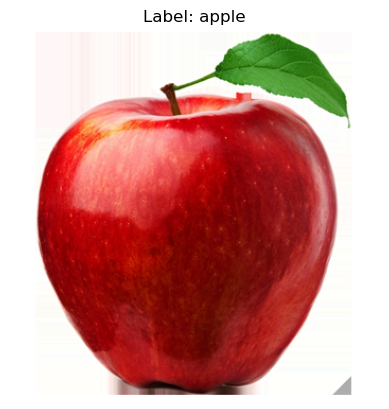

In [26]:
#Bывод по умолчанию предполагает что изображение будет в формате BGR. 
#В случае перевода формат в RGB мы сохраняем зеленый канал и меняем синий и 
#красный каналы местами. 

image = cv2.imread(path_train[0])
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(rgb_img)
plt.title("Label: " + labels_train[0])
plt.axis('off')
plt.show()

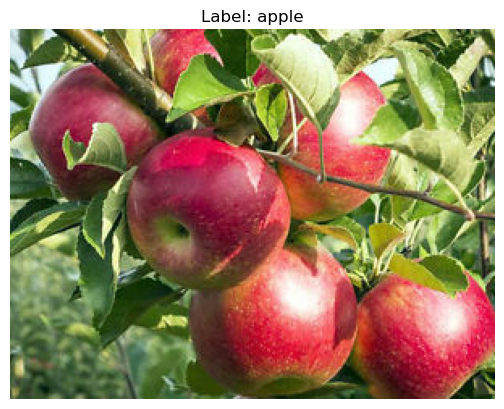

In [27]:
# Образец картинки из тестовой выборки

image = cv2.imread(path_test[0])

rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

plt.imshow(rgb_img)
plt.title("Label: " + labels_test[0])
plt.axis('off')
plt.show()

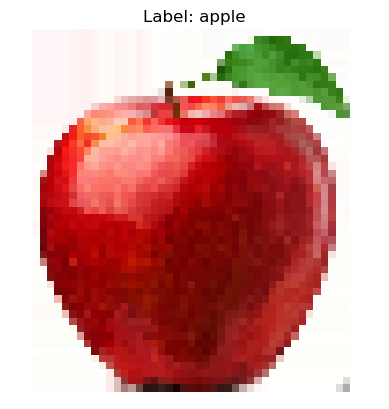

In [29]:
#Попробуем "загрубить" изображение

image = cv2.imread(path_train[0])
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
rgb_img_rude = cv2.resize(rgb_img, (50,50))
plt.imshow(rgb_img_rude)
plt.title("Label: " + labels_train[0])
plt.axis('off')
plt.show()

In [30]:
# Теперь для всей выборки:
X_train = []

for path in path_train:
    img = cv2.imread(path)    
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    final_img =  cv2.resize(rgb_img, (50,50))
    X_train.append(final_img)
    
X_train = np.array(X_train)

In [31]:
X_train.shape

(240, 50, 50, 3)

In [32]:
X_test = []

for path in path_test:
    img = cv2.imread(path)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    final_img = cv2.resize(rgb_img, (50,50))
    X_test.append(final_img)
    
X_test = np.array(X_test)  

In [33]:
X_test.shape

(60, 50, 50, 3)

In [34]:
# Создадим словарь с оригинальными метками.
fruits = {}

for i in range(len(label_train_unique)):
    fruits[label_train_unique[i]] = i
    
fruits

{'apple': 0, 'banana': 1, 'mixed': 2, 'orange': 3}

In [36]:
temp_train = []
temp_test = []


for label in labels_train:
    temp_train.append(fruits.get(label))

for label in labels_test:
    temp_test.append(fruits.get(label))

print("Length of train data: ", len(temp_train))
print("Length of test data: ", len(temp_test))

Length of train data:  240
Length of test data:  60


In [39]:
import tensorflow

In [40]:
# необходимо закодировать целевую переменную через one-hot encoding 


y_train = tensorflow.keras.utils.to_categorical(temp_train, 4)
y_test = tensorflow.keras.utils.to_categorical(temp_test, 4)

In [45]:
y_train[:5]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

Length of X_train:  240


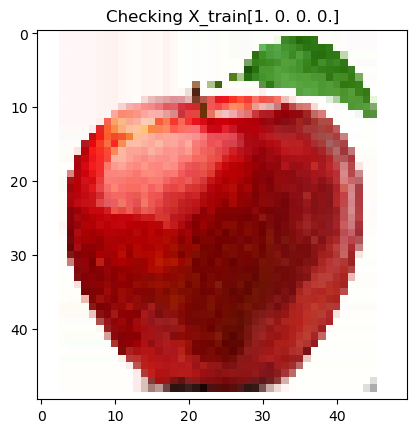

In [46]:
print("Length of X_train: ", len(X_train))
plt.imshow(X_train[0])
plt.title("Checking X_train"+str(y_train[0]))
plt.show()

In [47]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [48]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [49]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

print("\ny_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (240, 50, 50, 3)
X_test shape:  (60, 50, 50, 3)

y_train shape:  (240, 4)
y_test shape:  (60, 4)


In [51]:
# Строим сверточную модель
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (50, 50, 3), padding = 'same', activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding = 'same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation = 'softmax'))

In [54]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)

# снова укажем настройки модели
model.compile(optimizer = optimizer, 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 22, 64)        36928     
                                                      

In [55]:
# обучаем модель методом .fit()
# Для сокращения времени обучения примем 50 эпох
history = model.fit(X_train, y_train, 
                    batch_size = 32, 
                    epochs = 50, 
                    validation_split = 0.2, 
                    shuffle = True)

Epoch 1/50
6/6 [==============================] - 7s 681ms/step - loss: 1.3723 - accuracy: 0.4115 - val_loss: 1.5595 - val_accuracy: 0.0000e+00
Epoch 2/50
6/6 [==============================] - 3s 574ms/step - loss: 1.1718 - accuracy: 0.5208 - val_loss: 2.0896 - val_accuracy: 0.0000e+00
Epoch 3/50
6/6 [==============================] - 3s 576ms/step - loss: 1.0196 - accuracy: 0.6667 - val_loss: 1.5513 - val_accuracy: 0.0000e+00
Epoch 4/50
6/6 [==============================] - 3s 580ms/step - loss: 0.7988 - accuracy: 0.6927 - val_loss: 1.6904 - val_accuracy: 0.0000e+00
Epoch 5/50
6/6 [==============================] - 3s 572ms/step - loss: 0.6510 - accuracy: 0.7344 - val_loss: 1.6164 - val_accuracy: 0.0208
Epoch 6/50
6/6 [==============================] - 3s 582ms/step - loss: 0.6527 - accuracy: 0.7552 - val_loss: 1.3533 - val_accuracy: 0.2083
Epoch 7/50
6/6 [==============================] - 4s 622ms/step - loss: 0.6211 - accuracy: 0.7396 - val_loss: 1.5754 - val_accuracy: 0.0833
Epoc

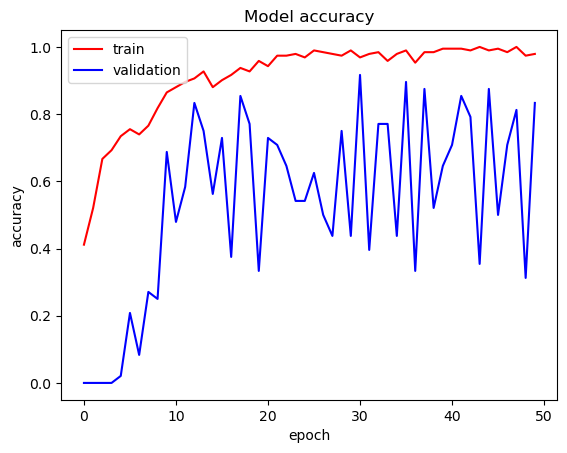

In [56]:
plt.plot(history.history['accuracy'], label='train', color="red")
plt.plot(history.history['val_accuracy'], label='validation', color="blue")
plt.title('Model accuracy')
plt.legend(loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

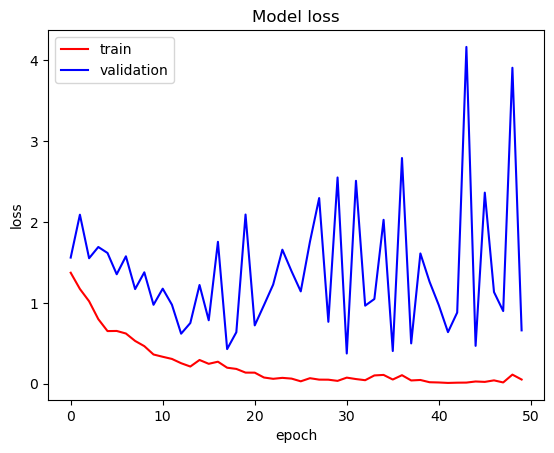

In [57]:
plt.plot(history.history['loss'], label='train', color="red")
plt.plot(history.history['val_loss'], label='validation', color="blue")
plt.title('Model loss')
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [58]:
score, accuracy = model.evaluate(X_test, y_test)
print('Test score achieved:', score)
print('Test accuracy achieved:', accuracy)

2/2 [==============================] - 0s 138ms/step - loss: 0.7207 - accuracy: 0.8333
Test score achieved: 0.7207250595092773
Test accuracy achieved: 0.8333333134651184


In [59]:
pred = model.predict(X_test)

2/2 [==============================] - 1s 132ms/step


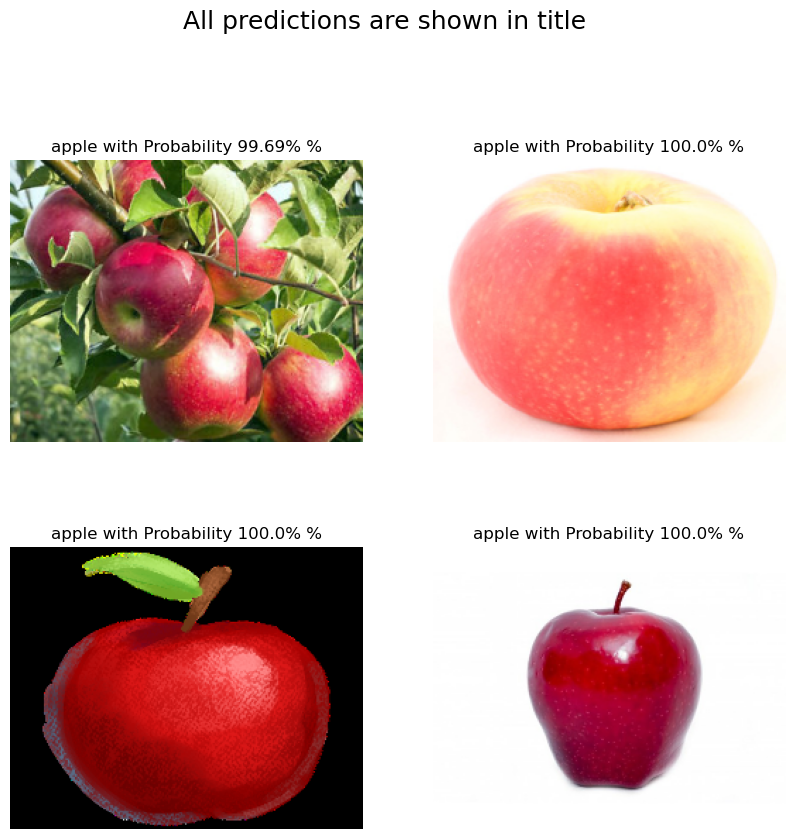

In [60]:
fig, axs= plt.subplots(2,2, figsize=[10,10])
fig.subplots_adjust(hspace=.01)


count=0
for i in range(2):    
    for j in range(2):  
        
        img = cv2.imread(path_test[count])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        img = cv2.resize(img, (250,200))
        result = np.argsort(pred[count])[::-1]
        
        i_max = -1
        max_val = ""
        for (k,val) in enumerate(fruits.keys()):
            
            if(pred[count][k] > i_max):
                i_max = pred[count][k]
                max_val = val
        
        txt = str(max_val) + " with Probability "+ str("{:.4}%".format(i_max*100)) + " %"
            
        
        axs[i][j].imshow(img)
        axs[i][j].set_title(txt)
        axs[i][j].axis('off')

        count+=1
        
plt.suptitle("All predictions are shown in title", fontsize = 18)        
plt.show()

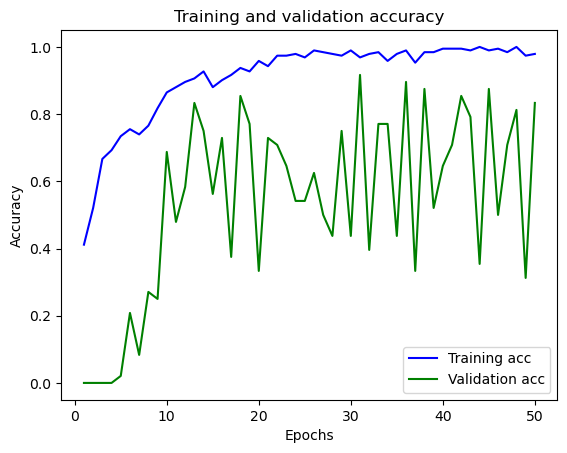

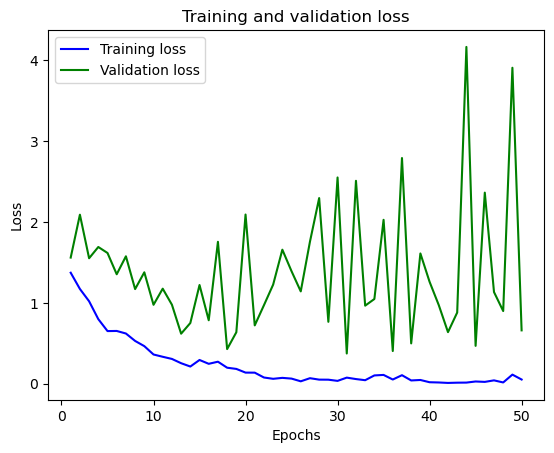

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Training and validation accuracy')
plt.legend()
fig = plt.figure()
fig.savefig('acc.png')


plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')

plt.legend()
plt.show()

### ВЫВОДЫ:
**Проведенные исследования нейросети показали, что для оптимального уменьшения потерь достаточно использовать от 20 до 30 эпох. Дальше на валидационной выборке потери опять начинают расти. Вероятно, может появляться переобучение.**

**Необходимо проводить эксперименты с подбором правильной структуры нейронной сети. Однако это является весьма затратным по времени процессом. Необходимо проверять многие архитектуры (типы внутренних слоев, которые необходимо настраивать и т.п.).**

**Правильная настройка может значительно улучшить производительность сети. В этом случае требуется детализировать параметры, такие как функция активации, скорость обучения, размер батча и другие.**